In [598]:
import pandas as pd
import copy
import math
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from scipy.interpolate import make_interp_spline

In [584]:
df_copy = pd.read_csv("Wildfire_Dataset.csv")

C:\Users\erikw\AppData\Local\Temp\ipykernel_8348\3328195843.py:1: DtypeWarning: Columns (7,8,16,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df_copy = pd.read_csv("Wildfire_Dataset.csv")


In [585]:
df = copy.deepcopy(df_copy)
df.drop(["Unnamed: 0", "FIPS_CODE"], axis=1, inplace=True)
df.drop("NWCG_CAUSE_AGE_CATEGORY", inplace=True, axis=1)

In [600]:
columns = {'FIRE_YEAR': "year",
       'DISCOVERY_DATE': "discovery_date", 'DISCOVERY_DOY': "discovery_doy", 'DISCOVERY_TIME': "discovery_time",
       'NWCG_CAUSE_CLASSIFICATION': "cause_class", 'NWCG_GENERAL_CAUSE': "cause_description",
       'NWCG_CAUSE_AGE_CATEGORY': "cause_age", 'CONT_DATE': "contained_date", 'CONT_DOY': "contained_doy", 'CONT_TIME': "contained_time",
       'FIRE_SIZE': "size", 'FIRE_SIZE_CLASS': "size_class", 'LATITUDE': "latitude", 'LONGITUDE': "longitude", 
       'STATE': "state", 'COUNTY': "county", 'FIPS_CODE': "fips_code", 'FIPS_NAME': "fips_name"}

df.rename(mapper= lambda column: columns[column] if column in columns.keys() else column, axis=1, inplace=True)

df["discovery_month"] = df["discovery_date"].apply(lambda date: int(date.split("/")[0]))
df["discovery_day"] = df["discovery_date"].apply(lambda date: int(date.split("/")[1]))


def calc_duration(series: pd.Series):
     if any(math.isnan(x) if (type(x) is not str) else False for x in [series["contained_doy"], series ["discovery_doy"], series["contained_date"], series["year"], series["contained_time"], series["discovery_time"]]):
          return None
     return series["contained_doy"] - series["discovery_doy"] + (int(series["contained_date"].split("/")[-1]) - series["year"]) * 365 + (int(series['contained_time']/100) - int(series['discovery_time']/100))/24

df["duration"] = df.apply(func= calc_duration, axis=1)
df["size"] = df["size"] * 0.404686

In [587]:
# Topic: How climate change affects wildfires in the USA



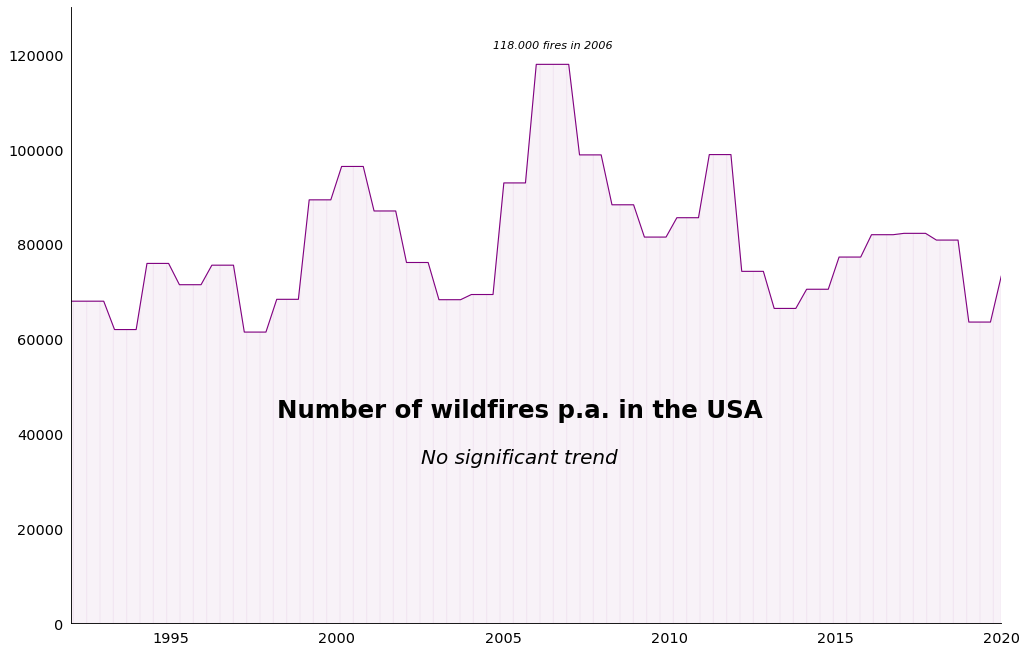

In [588]:
df_ = df.groupby("year").size()

x_new = np.linspace(1992, 2020, 87)  # Erhöht die Anzahl der Punkte für eine glattere Kurve
spl = make_interp_spline(df_.index, df_.values, k=0)  # Spline-Interpolation
y_smooth = spl(x_new)

fig, ax = plt.subplots(1, figsize=(15, 10), dpi=80)

ax.annotate("Number of wildfires p.a. in the USA", xy=(2005.5, 45_000), xycoords='data', color="black", fontsize=22, ha='center', va='center', fontweight = "bold")
ax.annotate("No significant trend", xy=(2005.5, 35_000), xycoords='data', color="black", fontsize=18, ha='center', va='center', fontstyle = "oblique")
ax.annotate("118.000 fires in 2006", xy=(2006.5, 122_000), xycoords='data', color="black", fontsize=10, ha='center', va='center', fontstyle = "oblique")

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
#ax.spines["left"].set_visible(False)

ax.set_ylim([0, 130_000])
ax.set_xlim([1992, 2020])
ax.fill_between(x_new, y_smooth, color="Purple", alpha=0.05, hatch="|")

ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=True)
ax.tick_params(axis='y', which='both', left=False, right=False, labelbottom=True)
ax.tick_params(axis='both', which='major', labelsize=13)

ax.plot(x_new, y_smooth, color="Purple", markersize=8, linewidth=1)


C:\Users\erikw\AppData\Local\Temp\ipykernel_8348\108844947.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(["0", "1.000.000", "2.000.000", "3.000.000", "4.000.000", "5.000.000",], fontsize=11)


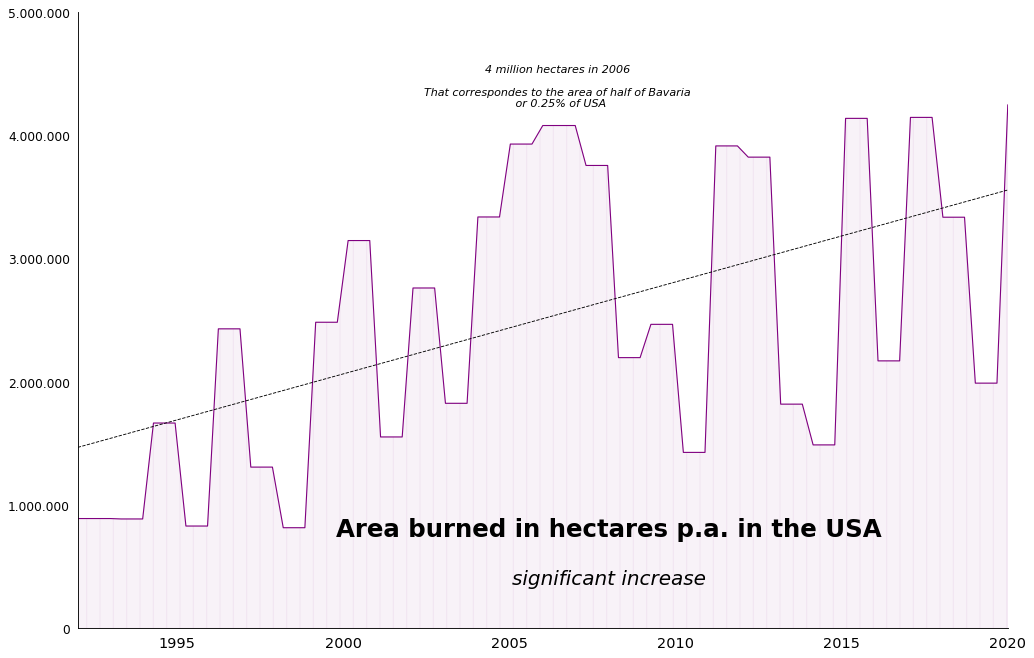

In [589]:
df_ = df.groupby("year")["size"].sum()

x_new = np.linspace(1992, 2020, 87)  # Erhöht die Anzahl der Punkte für eine glattere Kurve
spl = make_interp_spline(df_.index, df_.values, k=0)  # Spline-Interpolation
y_smooth = spl(x_new)

fig, ax = plt.subplots(1, figsize=(15, 10), dpi=80)

df_rolling = df_.rolling(window=5).mean().dropna()  # Drop NaN values resulted from rolling
avg_x_new = np.linspace(df_rolling.index.min(), df_rolling.index.max(), 300)  # More points for smoother curve
spl = make_interp_spline(df_rolling.index, df_rolling, k=2)
avg_y_smooth = spl(avg_x_new)


coefficients = np.polyfit(df_.index, df_.values, 1)
linear_regression = np.poly1d(coefficients)
regression_y = linear_regression(df_.index)


ax.annotate("Area burned in hectares p.a. in the USA", xy=(2008, 800_000), xycoords='data', color="black", fontsize=22, ha='center', va='center', fontweight = "bold")
ax.annotate("significant increase", xy=(2008, 400_000), xycoords='data', color="black", fontsize=18, ha='center', va='center', fontstyle = "oblique")
ax.annotate("4 million hectares in 2006 \n\nThat correspondes to the area of half of Bavaria \n or 0.25% of USA", xy=(2006.5, 4_400_000), xycoords='data', color="black", fontsize=10, ha='center', va='center', fontstyle = "oblique")

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
#ax.spines["left"].set_visible(False)

ax.set_ylim([0, 5_000_000])
ax.set_xlim([1992, 2020])
ax.fill_between(x_new, y_smooth, color="Purple", alpha=0.05, hatch="|")

ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=True)
ax.tick_params(axis='y', which='both', left=False, right=False, labelbottom=True)
ax.tick_params(axis='both', which='major', labelsize=13)

ax.set_yticklabels(["0", "1.000.000", "2.000.000", "3.000.000", "4.000.000", "5.000.000",], fontsize=11)

ax.plot(x_new, y_smooth, color="Purple", markersize=8, linewidth=1)
ax.plot(df_.index, regression_y, label='5-Year Average', color='black', linestyle='--', linewidth=0.8)

In [590]:
df_.values[:4:]

array([ 890277.84938027,  886904.57789606, 1665518.55848741,
        829425.46929839])

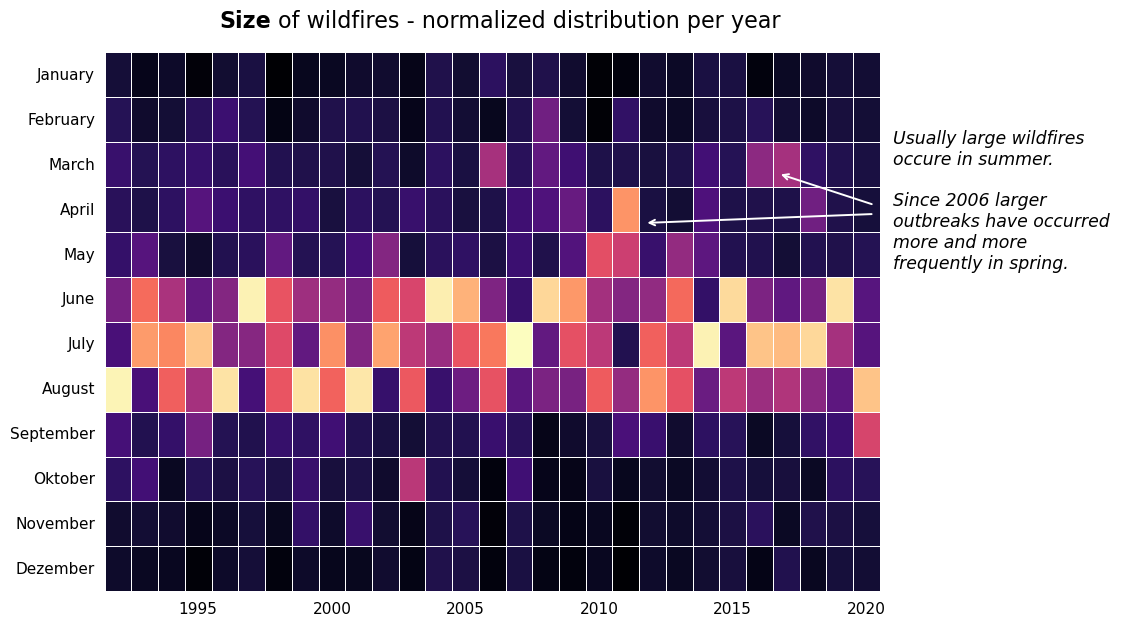

In [591]:
# Eriks Code

pivot_table = df.pivot_table(values="size", index='discovery_month', columns='year', aggfunc="sum", fill_value=0)
pivot_table = (pivot_table - pivot_table.mean()) / (pivot_table.std())

plt.figure(figsize=(10, 7))
sns.heatmap(pivot_table, cmap='magma', cbar=False, linecolor="white", linewidths=0.5)

plt.text(x=29.5 , y=3.3, s="Usually large wildfires \noccure in summer. \n\nSince 2006 larger \noutbreaks have occurred \nmore and more \nfrequently in spring.", fontsize=12.5, va='center', rotation=0, fontstyle="oblique")
plt.text(x=4.3 , y=-0.7, s="Size", fontsize=16, va='center', rotation=0, fontweight="bold")
plt.text(x=6.5 , y=-0.7, s="of wildfires - normalized distribution per year", fontsize=16, va='center', rotation=0)

plt.annotate("", xy=(20.2, 3.8), xytext=(28.8, 3.6), arrowprops=dict(facecolor='white', edgecolor='white', linewidth=1.4, arrowstyle='->'))
plt.annotate("", xy=(25.2, 2.7), xytext=(28.8, 3.4), arrowprops=dict(facecolor='white', edgecolor='white', linewidth=1.4, arrowstyle='->'))

ax = plt.gca()
ax.set_xticks(np.arange(3.5, len(pivot_table.columns), 5))  
ax.set_xticklabels(pivot_table.columns[3::5], fontsize=11)  

ax.set_yticklabels(["January", "February", "March", "April", "May", "June", "July", "August", "September", "Oktober", "November", "Dezember"], fontsize=11)

ax.set_xlabel("")
ax.set_ylabel("")

ax.tick_params(axis='both', which='both', bottom=False, top=False, right=False, left=False, labelbottom=True, rotation = 0)

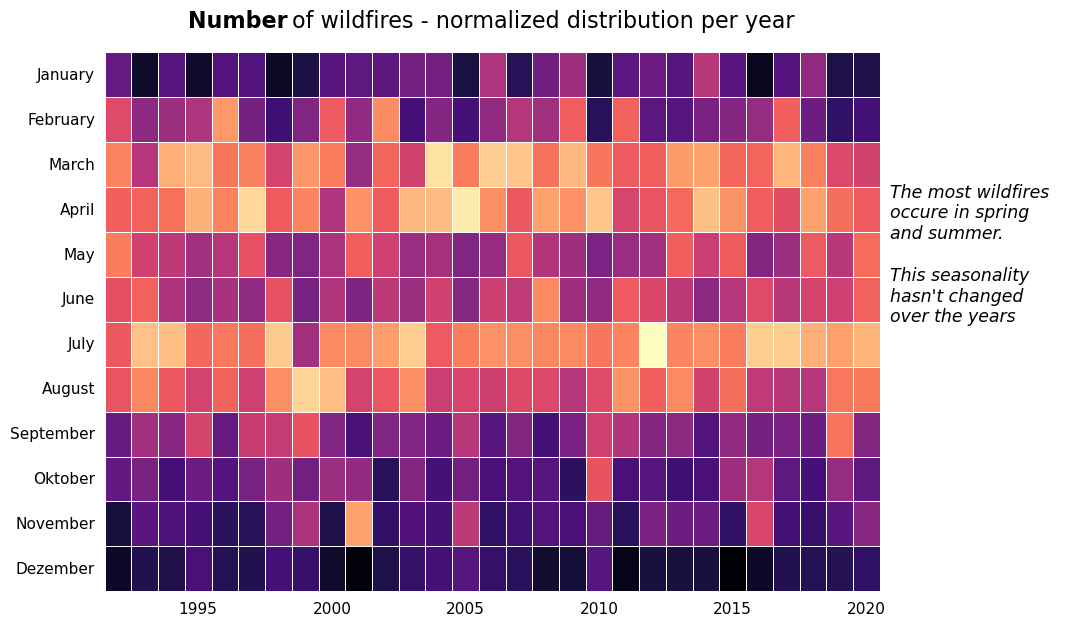

In [592]:
pivot_table = df.pivot_table(values="latitude", index='discovery_month', columns='year', aggfunc="size", fill_value=0)
pivot_table = (pivot_table - pivot_table.mean()) / (pivot_table.std())

plt.figure(figsize=(10, 7))
sns.heatmap(pivot_table, cmap='magma', cbar=False, linecolor="white", linewidths=0.5)

plt.text(x=29.4 , y=4.5, s="The most wildfires \noccure in spring \nand summer. \n\nThis seasonality \nhasn't changed \nover the years", fontsize=12.5, va='center', rotation=0, fontstyle="oblique")
plt.text(x=3.1 , y=-0.7, s="Number", fontsize=16, va='center', rotation=0, fontweight="bold")
plt.text(x=7 , y=-0.7, s="of wildfires - normalized distribution per year", fontsize=16, va='center', rotation=0)

ax = plt.gca()
ax.set_xticks(np.arange(3.5, len(pivot_table.columns), 5))  # Setzt Ticks alle 5 Jahre
ax.set_xticklabels(pivot_table.columns[3::5], fontsize=11)  # Setzt Labels alle 5 Jahre

ax.set_yticklabels(["January", "February", "March", "April", "May", "June", "July", "August", "September", "Oktober", "November", "Dezember"], fontsize=11)

ax.set_xlabel("")
ax.set_ylabel("")

ax.tick_params(axis='both', which='both', bottom=False, top=False, right=False, left=False, labelbottom=True, rotation= 0)



In [593]:
# Christophs Code

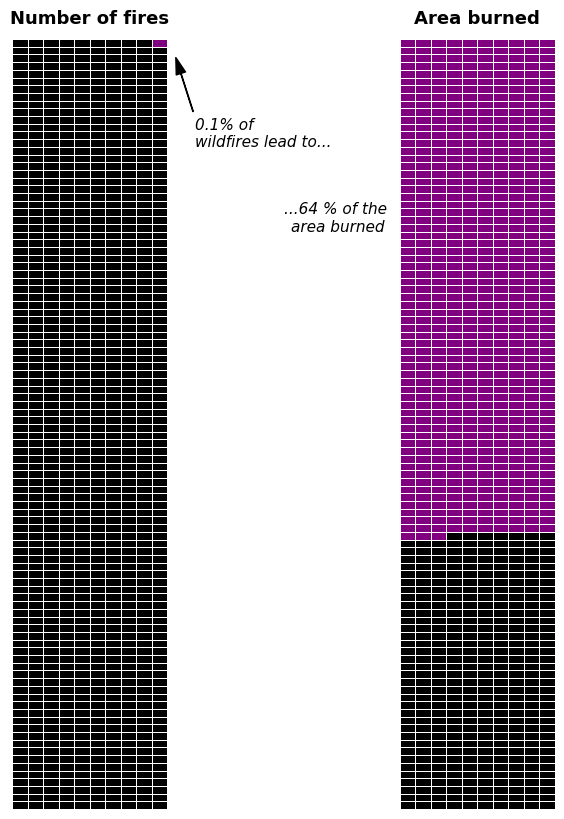

In [594]:
# Analyse der Größenverteilung 

df_ = df
df_.sort_values(by="size", inplace=True)
BOUNDARY = 0.999
percentage_size = 100*round(df_.iloc[int(BOUNDARY*len(df_)) : len(df_)]["size"].sum() / df_["size"].sum(), 3)
array_number = np.zeros((100, 10))
array_number[0:1, 9] = 1

array_size = np.zeros((100, 10))
array_size[0:int(percentage_size), ::] = 1
array_size[int(percentage_size), 0:int(10*round(percentage_size%1, 2))] = 1


colors = ["black", "purple"]
cmap = sns.color_palette(colors, as_cmap=True)

fig, ax = plt.subplots(1, 2, figsize=(7, 10), gridspec_kw={'hspace': 0, 'wspace': 1.5})
sns.heatmap(array_number, ax=ax[0], cbar=False, linecolor="white", linewidths=0.5, cmap=cmap)
sns.heatmap(array_size, ax=ax[1], cbar=False, linecolor="white", linewidths=0.5, cmap=cmap)

ax[0].annotate('0.1% of \nwildfires lead to...',
               xy=(1.05, 0.98), xycoords='axes fraction',
               xytext=(1.18, 0.86), textcoords='axes fraction',
               ha='left', fontsize=11, fontstyle="italic", color='black',
               arrowprops=dict(facecolor='black', shrink=0.05, width=0.3, headwidth=7))
ax[1].annotate('...64 % of the \narea burned', xy=(-0.4, 0.75), xycoords='axes fraction', ha='center', fontsize=11, fontstyle="italic", color='black')

ax[0].annotate('Number of fires', xy=(0.5, 1.02), xycoords='axes fraction', ha='center', fontsize=13, color='black', fontweight="bold")
ax[1].annotate('Area burned', xy=(0.5, 1.02), xycoords='axes fraction', ha='center', fontsize=13, color='black', fontweight="bold")

for i in range(2):
    ax[i].tick_params(axis='both', which='both', bottom=False, top=False, right=False, left=False, labelbottom=False, labelleft= False, rotation= 0)

-> Its not about how many wildfires occure. Its about how many break through uncontrollably.

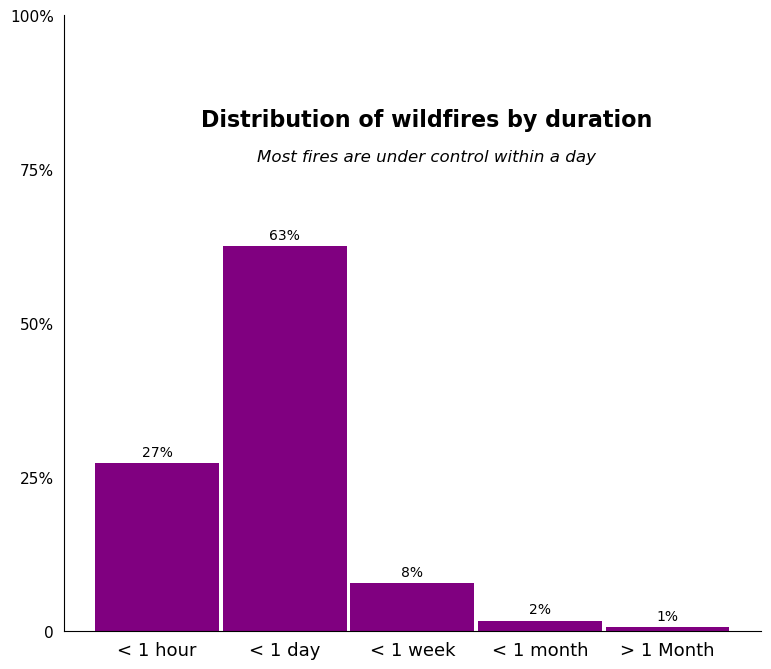

In [682]:
branddauern = list(df.duration[df.duration.notna()])

# Branddauern in Kategorien einteilen
kategorien = ['< 1 hour', '< 1 day', '< 1 week', '< 1 month', '> 1 Month']
kategorien_counts = [0] * len(kategorien)

for dauer in branddauern:
    if dauer <= 0.041:
        kategorien_counts[0] += 1
    elif dauer <= 1:
        kategorien_counts[1] += 1
    elif dauer <= 7:
        kategorien_counts[2] += 1
    elif dauer <= 30:
        kategorien_counts[3] += 1
    else:
        kategorien_counts[4] += 1

kategorien_counts = [i/sum(kategorien_counts) for i in kategorien_counts]


# Balkendiagramm erstellen
fig, ax = plt.subplots(figsize=(9, 8))
bars = ax.bar(kategorien, kategorien_counts, width= 0.97, color='purple')

ax.annotate('Distribution of wildfires by duration', xy=(0.52, 0.82), xycoords='axes fraction', ha='center', fontsize=16, color='black', fontweight="bold")
ax.annotate("Most fires are under control within a day", xy=(0.52, 0.77), xycoords='axes fraction', color="black", fontsize=12, ha='center', va='center', fontstyle = "italic")

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=True)
ax.tick_params(axis='y', which='both', left=False, right=False, labelbottom=True)
ax.tick_params(axis='both', which='major', labelsize=13)

ax.set_yticks(np.linspace(0, 1, 5))
ax.set_yticklabels(["0", "25%", "50%", "75%", "100%"], fontsize=11)

# Werte über den Balken anzeigen
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{round(height * 100)}%',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords='offset points',
                ha='center', va='bottom')
    
plt.show()
